# Multi-class Klassificering och Sigmoid

I förra notebooken byggde vi en Perceptron som kan lösa **binära** klassificeringsproblem - den kan svara "ja" eller "nej", "överlevde" eller "dog". Men vad händer när vi har fler än två kategorier?

**Problemet:** Vilken art är denna pingvin - Adelie, Chinstrap eller Gentoo?

En enda perceptron kan bara svara 0 eller 1. Den kan inte säga "kategori 2 av 3". Vi behöver en ny strategi.

In [86]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from perceptron import Perceptron

---

## Övning 2: Pingviner (multiclass & one-hot)

**Problemet:** Titanic var enkelt: Ja eller Nej. Men tänk om vi vill veta _vilken_ art en pingvin tillhör? Svaret är inte 0 eller 1, utan "Adelie", "Chinstrap" eller "Gentoo". Vi kallar detta **multiclass classification** när vi har tre eller fler möjliga svar.

En ensam perceptron kan inte svara på detta. Vi behöver flera där vardera kan försöka identifiera respektive art.

### Lösningen: Ett nätverk av experter

Vi ska bygga ett nätverk som innehåller **tre perceptroner**:

1. En som är expert på att hitta **Adelie**
2. En som är expert på att hitta **Chinstrap**
3. En som är expert på att hitta **Gentoo**

Men för att träningen ska fungera, och spela väl med våra algoritmer som använder matematik, behöver vi representera de olika möjliga svaren på ett speciellt sätt.

### One-Hot Encoding av facit

När vårt nätverk har olika kategorier av svar, översätter vi svaren till att bli en lista av 0:or eller 1:or. Platsen (index) i listan indikerar vilken kategori som är svaret.

| Art | One-Hot |
|-----|--------|
| Adelie | `[1, 0, 0]` |
| Chinstrap | `[0, 1, 0]` |
| Gentoo | `[0, 0, 1]` |

Nätverket kommer svara med en lista av identifierade arter:
- Svaret `[1, 0, 0]` betyder att nätverket har identifierat **Adelie**
- Svaret `[0, 0, 1]` betyder **Gentoo**

Varje perceptron tränas mot sin respektive kolumn i svaret.

In [87]:
# Ladda pingvin-data
scaler = MinMaxScaler()

penguins = pd.read_csv('data/penguins.csv')
penguins = penguins.dropna()

X = penguins[["flipper_length_mm", "bill_length_mm"]].values
X = scaler.fit_transform(X)  # Normalisering

# One-Hot Encoding av arterna
# pandas .get_dummies() gör detta automatiskt åt oss!
y_onehot = pd.get_dummies(penguins["species"], dtype=int).values


print(f"Antal pingviner: {len(X)}")
print(f"\nExempel på input (normaliserad): {X[0]}")
print(f"Exempel på one-hot facit: {y_onehot[0]}")
print(f"\nKolumnordning: {list(pd.get_dummies(penguins['species']).columns)}")

Antal pingviner: 333

Exempel på input (normaliserad): [0.15254237 0.25454545]
Exempel på one-hot facit: [1 0 0]

Kolumnordning: ['Adelie', 'Chinstrap', 'Gentoo']


### Bygg Nätverket

Nu bygger vi `PenguinNetwork` - ett nätverk med tre perceptroner som samarbetar.

In [88]:
class PenguinNetwork:
    def __init__(self, n_inputs=2):
        self.perceptrons = [
            Perceptron(n_inputs, learning_rate=0.1, n_iterations=100),
            Perceptron(n_inputs, learning_rate=0.1, n_iterations=100),
            Perceptron(n_inputs, learning_rate=0.1, n_iterations=100)
        ]
        self.species_names = ["Adelie", "Chinstrap", "Gentoo"]

    def train(self, inputs, one_hot_targets):
        for i, p in enumerate(self.perceptrons):
            # Skapa en lista med facit BARA för denna art
            specific_targets = [target[i] for target in one_hot_targets]
            p.fit(inputs, specific_targets)

    def predict(self, input_data):
        # Fråga alla tre perceptronerna
        return [p.predict(input_data) for p in self.perceptrons]

# Skapa och träna nätverket
penguin_net = PenguinNetwork()
penguin_net.train(X.tolist(), y_onehot.tolist())

print("Träning klar!")

Träning klar!


### Testa nätverket

Låt oss se vad nätverket gissar för några pingviner:

In [89]:
print("\n--- Testar nätverket ---")

for i in range(30):
    prediction = penguin_net.predict(X[i].tolist())
    actual = penguin_net.species_names[np.argmax(y_onehot[i])]
    print(f"Prediktion: {prediction}, Facit: {actual}")


--- Testar nätverket ---
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 1, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 1, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [1, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 0, 0], Facit: Adelie
Prediktion: [0, 1, 0], Facit: Adelie
Prediktion: [0, 1, 0], Facit: Adelie
Prediktion: [0, 1, 0], Facit: Adelie
Prediktion: 

### Problemet: Konflikter!

Titta noga på prediktionerna. Du kommer troligen se problem som:

- **`[1, 1, 0]`:** Både Adelie-experten och Chinstrap-experten skriker "JA!". Vem ska vi lita på?
- **`[0, 0, 0]`:** Ingen känner igen pingvinen.

Stegfunktionen ger bara hårda "ja" eller "nej"-svar. Vi har ingen aning om hur **säker** varje perceptron är.

**Vi behöver en bättre strategi för att avgöra vem vi kan lita på mest!**

---

## Övning 3: Uppgraderingen (Sigmoid)

**Lösning:** För att lösa konflikten måste vi byta ut den hårda steg-funktionen mot den mjuka **Sigmoid-funktionen**.

Istället för att svara `1` (Ja), svarar perceptronen kanske `0.98` (98% säker på Ja).

### Stegfunktion vs Sigmoid

**Stegfunktion (nuvarande):**
```python
def activate(self, value):
    return 1 if value > 0 else 0  # Binärt: ja eller nej
```

**Sigmoid-funktion (ny):**
```python
def activate(self, value):
    return 1 / (1 + math.exp(-value))  # Kläm ihop mellan 0 och 1
```

Sigmoid tar vilket tal som helst och "klämmer ihop" det till ett värde mellan 0 och 1. Detta ger oss:

1. **Nyanserade svar:** Istället för "Ja" kan den säga "87% chans"
2. **Bättre feedback för lärande:** Vi kan se _hur nära_ vi var ett korrekt beslut

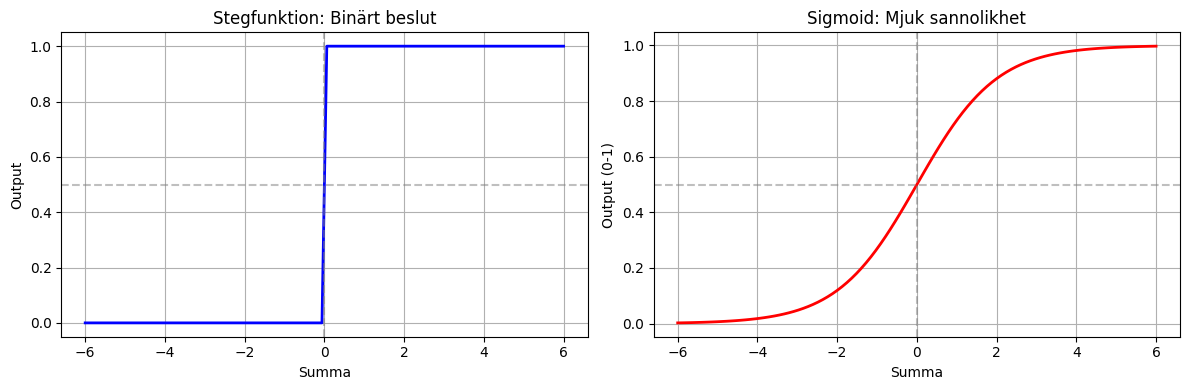

In [90]:
# Visualisera skillnaden mellan steg och sigmoid
import matplotlib.pyplot as plt
import math

x = np.linspace(-6, 6, 100)

# Stegfunktion
step = [1 if val > 0 else 0 for val in x]

# Sigmoid
sigmoid = [1 / (1 + math.exp(-val)) for val in x]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, step, 'b-', linewidth=2)
axes[0].set_title('Stegfunktion: Binärt beslut')
axes[0].set_xlabel('Summa')
axes[0].set_ylabel('Output')
axes[0].grid(True)
axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)

axes[1].plot(x, sigmoid, 'r-', linewidth=2)
axes[1].set_title('Sigmoid: Mjuk sannolikhet')
axes[1].set_xlabel('Summa')
axes[1].set_ylabel('Output (0-1)')
axes[1].grid(True)
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Använd SigmoidPerceptron

I `perceptron.py` finns redan en `SigmoidPerceptron`-klass som ärver från `Perceptron`. Se till att dess aktiveringsfunktion använder sigmoid.

Låt oss uppdatera vårt pingvin-nätverk:

In [91]:
from perceptron import SigmoidPerceptron

class PenguinNetworkSigmoid:
    def __init__(self, n_inputs=2):
        self.perceptrons = [
            SigmoidPerceptron(n_inputs, learning_rate=0.1, n_iterations=100),
            SigmoidPerceptron(n_inputs, learning_rate=0.1, n_iterations=100),
            SigmoidPerceptron(n_inputs, learning_rate=0.1, n_iterations=100)
        ]
        self.species_names = ["Adelie", "Chinstrap", "Gentoo"]

    def train(self, inputs, one_hot_targets):
        for i, p in enumerate(self.perceptrons):
            specific_targets = [target[i] for target in one_hot_targets]
            p.fit(inputs, specific_targets)

    def predict(self, input_data):
        return [p.predict(input_data) for p in self.perceptrons]

# Träna det nya nätverket
penguin_net_sigmoid = PenguinNetworkSigmoid()
penguin_net_sigmoid.train(X.tolist(), y_onehot.tolist())

print("Träning klar!")

Träning klar!


In [92]:
# Testa det nya nätverket
print("\n--- Testar nätverket med Sigmoid ---")
for i in range(10):
    probs = penguin_net_sigmoid.predict(X[i].tolist())
    predicted = penguin_net_sigmoid.species_names[np.argmax(probs)]
    actual = penguin_net_sigmoid.species_names[np.argmax(y_onehot[i])]
    probs_str = [f"{p:.2f}" for p in probs]
    status = "✓" if predicted == actual else "✗"
    print(f"Sannolikheter: {probs_str}, Gissning: {predicted}, Facit: {actual} {status}")


--- Testar nätverket med Sigmoid ---
Sannolikheter: ['0.97', '0.23', '0.00'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.94', '0.10', '0.00'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.81', '0.02', '0.03'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.99', '0.00', '0.01'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.93', '0.03', '0.00'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.97', '0.21', '0.00'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.90', '0.01', '0.03'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.87', '0.50', '0.00'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['0.95', '0.02', '0.01'], Gissning: Adelie, Facit: Adelie ✓
Sannolikheter: ['1.00', '0.00', '0.09'], Gissning: Adelie, Facit: Adelie ✓


**Analys:**

Nu får vi tre siffror, t.ex: `[0.92, 0.15, 0.03]`.

Både Adelie (0.92) och Chinstrap (0.15) hade sagt "Ja" med den gamla metoden om de var över 0.5. Men nu ser vi tydligt att Adelie är vinnaren med 92% konfidens.

Vi använder `argmax` för att hitta indexet med högst värde - det är vår prediktion!

### Beräkna noggrannhet

In [93]:
def compute_accuracy(network, inputs, targets):
    """
    Beräknar noggrannhet för nätverk med one-hot encoded targets.
    """
    correct = 0
    total = len(inputs)

    for i, x in enumerate(inputs):
        prediction = network.predict(x)
        target = targets[i]

        # Hitta indexet med högst sannolikhet
        predicted_class = np.argmax(prediction)
        # Hitta indexet där 1:an sitter i one-hot target
        actual_class = np.argmax(target)

        if predicted_class == actual_class:
            correct += 1

    return correct / total

accuracy = compute_accuracy(penguin_net_sigmoid, X.tolist(), y_onehot.tolist())
print(f"Noggrannhet med Sigmoid: {accuracy * 100:.2f}%")

Noggrannhet med Sigmoid: 95.20%


---

## Övning 4: SimpleNeuralNetwork (Generalisering)

**Syfte:** Att skriva en ny klass för varje problem (`PenguinNetwork`, `TitanicNetwork`...) är jobbigt. Vi vill ha en **generell** klass som kan skapa hur många perceptroner som helst beroende på problemet.

Vi kallar den `SimpleNeuralNetwork`. Det är i princip exakt samma kod som `PenguinNetwork`, men vi byter ut det hårda värdet `3` mot variabeln `num_outputs`.

Öppna `simple_network.py` och granska klassen. Det finns några TODO:s som du borde kunna lösa.

Detta är början på ett riktigt Neuralt Nätverk (fast utan gömda lager).

In [94]:
from simple_network import SimpleNeuralNetwork, compute_accuracy

# Testa på pingvin-data
network = SimpleNeuralNetwork(num_inputs=2, num_outputs=3, learning_rate=0.1, n_iterations=100)
network.train(X.tolist(), y_onehot.tolist())

accuracy = compute_accuracy(network, X.tolist(), y_onehot.tolist())
print(f"Noggrannhet med SimpleNeuralNetwork: {accuracy * 100:.2f}%")

Noggrannhet med SimpleNeuralNetwork: 95.20%


---

## Övning 5: Upp till bevis

Nu har du ett generellt nätverk. Låt oss se vad det klarar av!

### Test A: Cancer-diagnostik (30 dimensioner)

Datasetet "Breast Cancer Wisconsin" har 30 inputs. Är det för svårt för din enkla modell?

In [95]:

scaler = MinMaxScaler()
# Ladda data

df = pd.read_csv('data/breast-cancer.csv')

data = df.drop(columns=['diagnosis']).values
targets = df['diagnosis'].values

X_cancer = scaler.fit_transform(data)
y_cancer_onehot = pd.get_dummies(targets, dtype=int).values

print(f"Antal features: {X_cancer.shape[1]}")
print(f"Antal exempel: {X_cancer.shape[0]}")
print(f"Antal klasser: {y_cancer_onehot.shape[1]}")

Antal features: 31
Antal exempel: 569
Antal klasser: 2


In [96]:
# Träna och testa
cancer_network = SimpleNeuralNetwork(num_inputs=30, num_outputs=2, learning_rate=0.1, n_iterations=50)
cancer_network.train(X_cancer.tolist(), y_cancer_onehot.tolist())

accuracy = compute_accuracy(cancer_network, X_cancer.tolist(), y_cancer_onehot.tolist())
print(f"Cancer-diagnostik noggrannhet: {accuracy * 100:.2f}%")

Cancer-diagnostik noggrannhet: 96.84%


**Resultat:** Du bör få över 90% rätt. 

### Test B: Handskrivna Siffror (Digits)

64 inputs (8x8 pixlar), 10 outputs (siffrorna 0-9).

In [97]:

digits = pd.read_csv('data/digits.csv')

data = digits.drop(columns=['target']).values
targets = digits['target'].values

X_digits = scaler.fit_transform(data)
y_digits_onehot = pd.get_dummies(targets, dtype=int).values

print(f"Antal features: {X_digits.shape[1]}")
print(f"Antal klasser: {y_digits_onehot.shape[1]}")

Antal features: 64
Antal klasser: 10


In [98]:
# Träna och testa
digits_network = SimpleNeuralNetwork(num_inputs=64, num_outputs=10, learning_rate=0.1, n_iterations=50)
digits_network.train(X_digits.tolist(), y_digits_onehot.tolist())

accuracy = compute_accuracy(digits_network, X_digits.tolist(), y_digits_onehot.tolist())
print(f"Handskrivna siffror noggrannhet: {accuracy * 100:.2f}%")

Handskrivna siffror noggrannhet: 98.61%


**Resultat:** Du bör få ca 95% rätt! Det visar att handstil faktiskt är ganska linjärt separerbar.

### Test C: Det omöjliga problemet (XOR)

Minns du XOR från förra notebooken? Låt oss se om vårt fina nya nätverk klarar det.

In [99]:
# XOR med one-hot encoding
X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor_onehot = [[1, 0], [0, 1], [0, 1], [1, 0]]  # [Klass0, Klass1]

xor_network = SimpleNeuralNetwork(num_inputs=2, num_outputs=2, learning_rate=0.1, n_iterations=500)
xor_network.train(X_xor, y_xor_onehot)

print("\n--- XOR-test ---")
for i, x in enumerate(X_xor):
    probs = xor_network.predict(x)
    predicted = np.argmax(probs)
    actual = np.argmax(y_xor_onehot[i])
    status = "✓" if predicted == actual else "✗"
    print(f"Input: {x}, Sannolikheter: {[f'{p:.2f}' for p in probs]}, Gissning: {predicted}, Facit: {actual} {status}")

accuracy = compute_accuracy(xor_network, X_xor, y_xor_onehot)
print(f"\nXOR noggrannhet: {accuracy * 100:.2f}%")


--- XOR-test ---
Input: [0, 0], Sannolikheter: ['0.49', '0.51'], Gissning: 1, Facit: 0 ✗
Input: [0, 1], Sannolikheter: ['0.50', '0.50'], Gissning: 1, Facit: 1 ✓
Input: [1, 0], Sannolikheter: ['0.51', '0.49'], Gissning: 0, Facit: 1 ✗
Input: [1, 1], Sannolikheter: ['0.53', '0.47'], Gissning: 0, Facit: 0 ✓

XOR noggrannhet: 50.00%


### Slutsats

Vi har bevisat att din kod kan:
- ✓ Rädda liv (Cancer-diagnostik med 30 features)
- ✓ Läsa handstil (Digits med 64 features)
- ✗ **INTE** lösa enkel logik (XOR med 2 features)

**Varför?**

Din modell består av raka linjer. Varje perceptron kan bara skapa en linjär beslutsgräns. XOR kräver att man kan "böja" gränsen - och det kan vi inte göra med bara ett lager.

**För att lösa XOR måste vi kunna böja rymden. Vi behöver gömda lager.**

---

## Perceptronens svaghet visualiserad

Låt oss visualisera varför XOR är omöjligt för en perceptron.

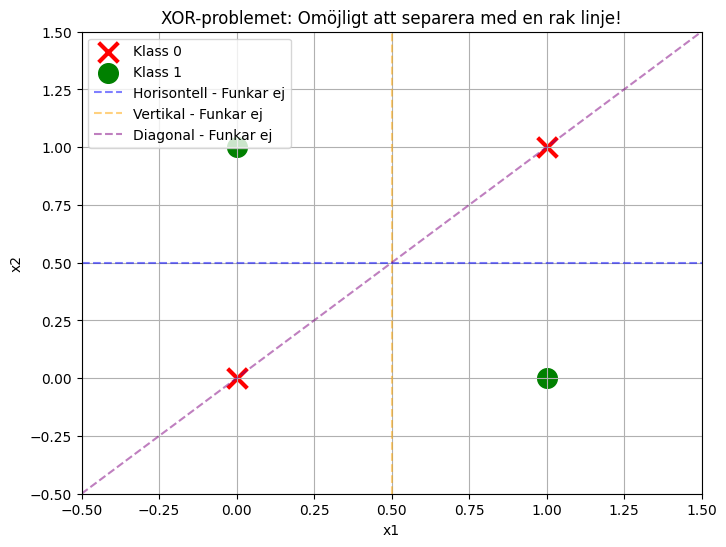

In [100]:
import matplotlib.pyplot as plt

# XOR-data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

plt.figure(figsize=(8, 6))

# Plotta punkterna
for i, (x, y) in enumerate(X_xor):
    if y_xor[i] == 0:
        plt.scatter(x, y, c='red', s=200, marker='x', linewidths=3, label='Klass 0' if i == 0 else '')
    else:
        plt.scatter(x, y, c='green', s=200, marker='o', label='Klass 1' if i == 1 else '')

# Rita några misslyckade försök att separera
x_line = np.linspace(-0.5, 1.5, 100)

# Horisontell linje
plt.plot(x_line, [0.5] * len(x_line), 'b--', alpha=0.5, label='Horisontell - Funkar ej')

# Vertikal linje
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Vertikal - Funkar ej')

# Diagonal linje
plt.plot(x_line, x_line, 'purple', linestyle='--', alpha=0.5, label='Diagonal - Funkar ej')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR-problemet: Omöjligt att separera med en rak linje!')
plt.legend()
plt.grid(True)
plt.show()

---

## Vad har vi lärt oss?

I denna notebook har vi:

1. Lärt oss **One-Hot Encoding** för multi-class klassificering
2. Byggt ett nätverk med **flera perceptroner** som samarbetar
3. Upptäckt **konflikter** när flera perceptroner säger "ja"
4. Löst konflikterna med **Sigmoid-aktiveringsfunktionen**
5. Skapat en **generell `SimpleNeuralNetwork`**-klass
6. Testat på riktiga dataset och fått imponerande resultat
7. **Slagit i väggen igen:** XOR går fortfarande inte att lösa!

## Nästa steg

Vi har lagt till fler perceptroner sida vid sida, men det räcker inte. För att lösa XOR behöver vi lägga neuroner **efter varandra** - i **gömda lager**.

I nästa notebook ska vi bygga ett riktigt neuralt nätverk med gömda lager!